# **Property Median Value and Median Tax**

## Analysis of Property Housing Data for District 7

In this notebook, we will analyze property housing data to provide insights into two key issues for District 7:

1. **The median and mean property evaluations and their increase over the years.**
2. **The median and mean property taxes and their increase over the years.**

These metrics will be compared against the Boston citywide averages to understand how District 7 differs from the rest of the city.

### Tasks to Achieve These Insights:

- **Data Cleaning**: We will handle missing values, remove duplicates, and ensure consistency in data formats. This includes filtering the dataset to focus on properties that belong to District 7 (`IS_D7`) or not.

- **Data Understanding**: We will review the metadata to interpret the meaning of each column. Key attributes of interest include:
  - **Total Property Price**
  - **Gross Tax**
  
  These attributes will help us contextualize property values and taxes.

- **Data Visualization**: We will create visualizations to compare trends over time. Specifically, we’ll analyze housing prices and property taxes in District 7 and compare these trends to Boston as a whole.

- **Analysis and Insights**: Finally, we will identify key patterns in the data. These insights will help inform policy or decision-making related to housing prices and property taxes, highlighting how District 7 might differ from the Boston average.

This outline provides a clear path for the analysis, emphasizing the comparison between District 7’s metrics and those of Boston as a whole.



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)

In [82]:
boston_df = pd.read_csv("../data/property-cleaned.csv", low_memory=False)

In [89]:
# boston_df["GROSS_TAX"] = boston_df["GROSS_TAX"].replace({"\\$": "", ",": ""}, regex=True).astype(float)
# boston_df["AV_TOTAL"] = boston_df["AV_TOTAL"].replace({"\\$": "", ",": ""}, regex=True).astype(float)
boston_df = boston_df[(boston_df["AV_TOTAL"] != 0) & ~boston_df["AV_TOTAL"].isna()]
district7_df = boston_df[boston_df.IS_D7 == 1]

In [90]:
district7_results = district7_df.groupby("YEAR").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")
    ).reset_index()

boston_results = boston_df.groupby("YEAR").agg(
    mean_housing_price=("AV_TOTAL", "mean"),
    std_housing_price=("AV_TOTAL", "std"),
    median_housing_price=("AV_TOTAL", "median"),
    median_gross_tax = ("GROSS_TAX", "median"),
    mean_gross_tax = ("GROSS_TAX", "mean")).reset_index()

In [91]:
boston_results

,YEAR,mean_housing_price,std_housing_price,median_housing_price,median_gross_tax,mean_gross_tax
0,2019,"2,618,581.51","32,727,579.88","502,600.00","5,187.79","15,953.16"
1,2020,"1,345,867.30","12,151,847.50","533,550.00","5,563.01","15,266.11"
2,2021,"1,423,316.97","12,708,686.03","576,900.00","6,076.57","16,182.63"
3,2022,"1,495,479.05","13,640,518.62","599,800.00","6,454.01","17,073.96"
4,2023,"1,577,190.50","14,481,637.93","637,400.00","6,761.91","17,798.61"
5,2024,"1,608,598.31","14,796,967.08","662,100.00","7,139.50","18,659.26"


In [92]:
def calculate_percentage_change(prices):
    return [0] + [
        ((prices.iloc[i] - prices.iloc[i - 1]) / prices.iloc[i - 1]) * 100
        for i in range(1, len(prices))
    ]

# Calculate percentage changes for district7
district7_median_percentage_change = calculate_percentage_change(district7_results["median_housing_price"])
district7_mean_percentage_change = calculate_percentage_change(district7_results["mean_housing_price"])
district7_median_tax_percentage_change = calculate_percentage_change(district7_results["median_gross_tax"])
district7_mean_tax_percentage_change = calculate_percentage_change(district7_results["mean_gross_tax"])

# Calculate percentage changes for boston
boston_median_percentage_change = calculate_percentage_change(boston_results["median_housing_price"])
boston_mean_percentage_change = calculate_percentage_change(boston_results["mean_housing_price"])
boston_median_tax_percentage_change = calculate_percentage_change(boston_results["median_gross_tax"])
boston_mean_tax_percentage_change = calculate_percentage_change(boston_results["mean_gross_tax"])

# Round the percentage change lists to 2 decimal places
district7_median_percentage_change = [round(value, 2) for value in district7_median_percentage_change]
district7_mean_percentage_change = [round(value, 2) for value in district7_mean_percentage_change]
district7_median_tax_percentage_change = [round(value, 2) for value in district7_median_tax_percentage_change]
district7_mean_tax_percentage_change = [round(value, 2) for value in district7_mean_tax_percentage_change]

boston_median_percentage_change = [round(value, 2) for value in boston_median_percentage_change]
boston_mean_percentage_change = [round(value, 2) for value in boston_mean_percentage_change]
boston_median_tax_percentage_change = [round(value, 2) for value in boston_median_tax_percentage_change]
boston_mean_tax_percentage_change = [round(value, 2) for value in boston_mean_tax_percentage_change]

# Print the final results
print("District 7 Median Percentage Change:", district7_median_percentage_change)
print("District 7 Mean Percentage Change:", district7_mean_percentage_change)
print("District 7 Median Tax Percentage Change:", district7_median_tax_percentage_change)
print("District 7 Mean Tax Percentage Change:", district7_mean_tax_percentage_change)
print("Boston Median Percentage Change:", boston_median_percentage_change)
print("Boston Mean Percentage Change:", boston_mean_percentage_change)
print("Boston Median Tax Percentage Change:", boston_median_tax_percentage_change)
print("Boston Mean Tax Percentage Change:", boston_mean_tax_percentage_change)

District 7 Median Percentage Change: [0, np.float64(6.5), np.float64(10.15), np.float64(3.94), np.float64(5.69), np.float64(3.92)]
District 7 Mean Percentage Change: [0, np.float64(-37.98), np.float64(3.28), np.float64(6.92), np.float64(0.43), np.float64(1.17)]
District 7 Median Tax Percentage Change: [0, np.float64(7.74), np.float64(11.6), np.float64(5.73), np.float64(4.61), np.float64(5.82)]
District 7 Mean Tax Percentage Change: [0, np.float64(2.18), np.float64(7.28), np.float64(7.26), np.float64(5.44), np.float64(1.79)]
Boston Median Percentage Change: [0, np.float64(6.16), np.float64(8.12), np.float64(3.97), np.float64(6.27), np.float64(3.88)]
Boston Mean Percentage Change: [0, np.float64(-48.6), np.float64(5.75), np.float64(5.07), np.float64(5.46), np.float64(1.99)]
Boston Median Tax Percentage Change: [0, np.float64(7.23), np.float64(9.23), np.float64(6.21), np.float64(4.77), np.float64(5.58)]
Boston Mean Tax Percentage Change: [0, np.float64(-4.31), np.float64(6.0), np.float64(

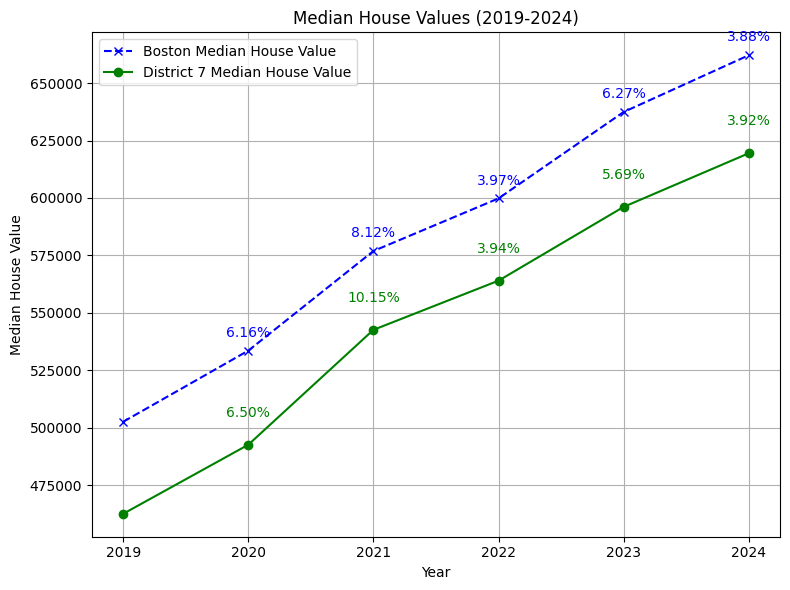

In [93]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["median_housing_price"], 
         linestyle="--", marker="x", label="Boston Median House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["median_housing_price"], 
         marker="o", label="District 7 Median House Value", color="green")

# Title and labels
plt.title("Median House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"])):
    plt.annotate(f"{boston_median_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["median_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


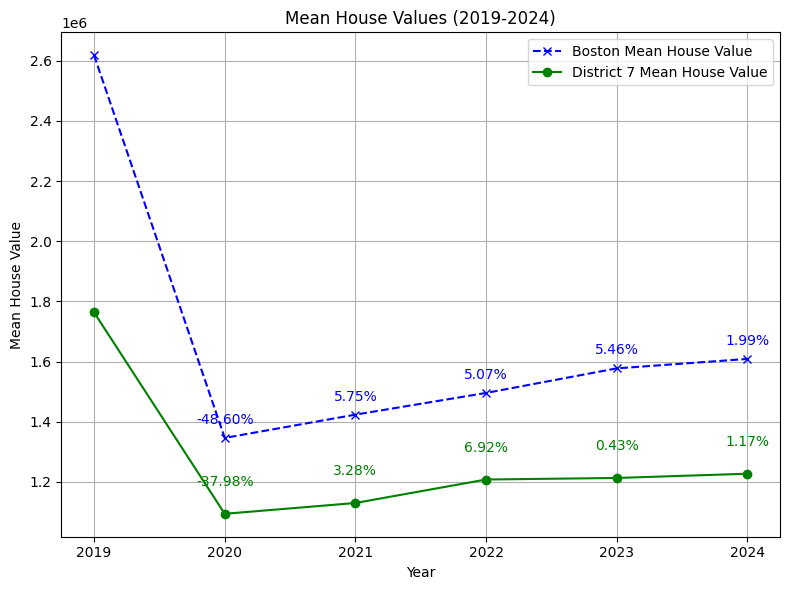

In [95]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["mean_housing_price"], 
         linestyle="--", marker="x", label="Boston Mean House Value", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["mean_housing_price"], 
         marker="o", label="District 7 Mean House Value", color="green")

# Title and labels
plt.title("Mean House Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"])):
    plt.annotate(f"{boston_mean_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["mean_housing_price"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [97]:
boston_results["YEAR"]

0    2019
1    2020
2    2021
3    2022
4    2023
5    2024
Name: YEAR, dtype: int64

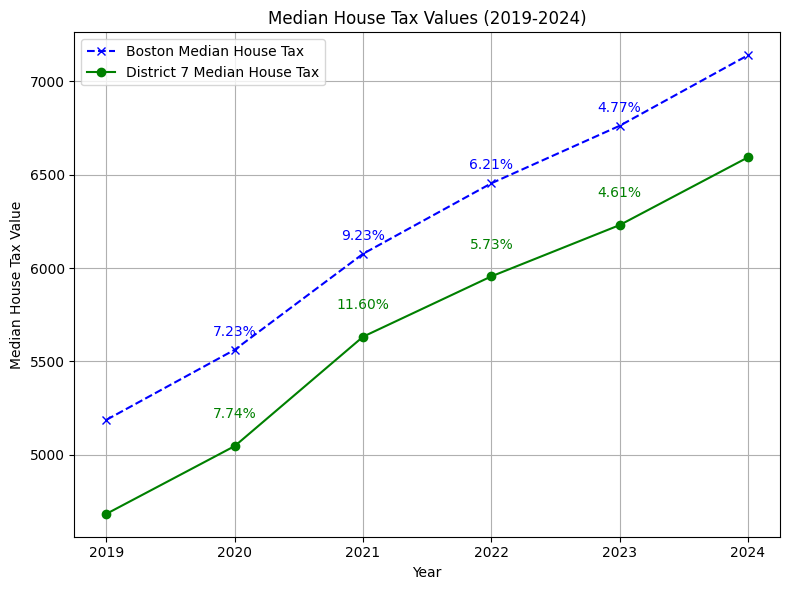

In [98]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["median_gross_tax"], 
         linestyle="--", marker="x", label="Boston Median House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["median_gross_tax"], 
         marker="o", label="District 7 Median House Tax", color="green")

# Title and labels
plt.title("Median House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Median House Tax Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"]) - 1):
    plt.annotate(f"{boston_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_median_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["median_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


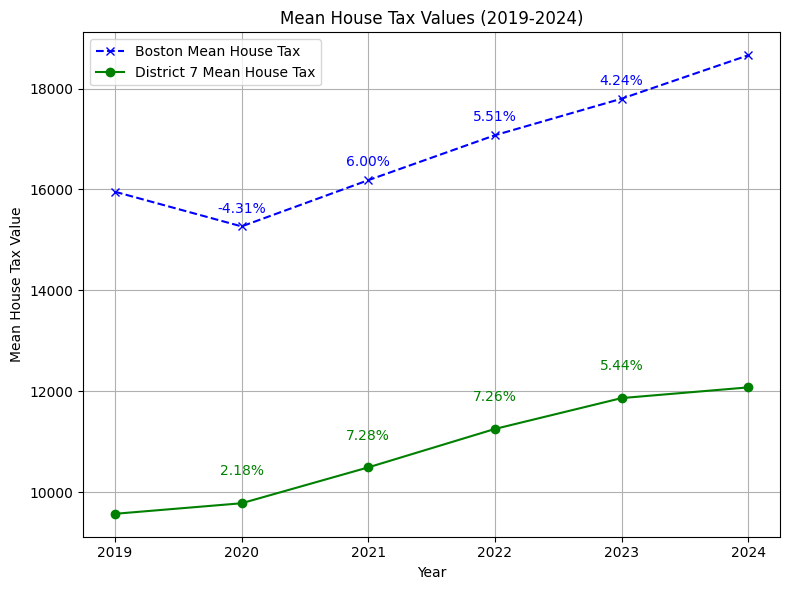

In [102]:
plt.figure(figsize=(8, 6))

# Plot Boston data
plt.plot(boston_results["YEAR"], boston_results["mean_gross_tax"], 
         linestyle="--", marker="x", label="Boston Mean House Tax", color="blue")

# Plot District 7 data
plt.plot(district7_results["YEAR"], district7_results["mean_gross_tax"], 
         marker="o", label="District 7 Mean House Tax", color="green")

# Title and labels
plt.title("Mean House Tax Values (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Mean House Tax Value")
plt.xticks(boston_results["YEAR"])

# Add the legend
plt.legend()

# Annotate percentage changes
for i in range(1, len(boston_results["YEAR"]) - 1):
    plt.annotate(f"{boston_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], boston_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha="center", color="blue")
    
    plt.annotate(f"{district7_mean_tax_percentage_change[i]:.2f}%", 
                 (boston_results["YEAR"][i], district7_results["mean_gross_tax"][i]), 
                 textcoords="offset points", 
                 xytext=(0, 20), 
                 ha="center", color="green")

# Grid and layout
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
